# weather classification

## Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns

SEED = 42

import tensorflow as tf
import keras

## 데이터 불러오기

In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SKT FLY AI/mini_project_03/weather_classification_data.csv')
weather.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
df = weather # target = weather type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature           13200 non-null  float64
 1   humidity              13200 non-null  int64  
 2   wind_speed            13200 non-null  float64
 3   precipitation_(%)     13200 non-null  float64
 4   cloud_cover           13200 non-null  object 
 5   atmospheric_pressure  13200 non-null  float64
 6   uv_index              13200 non-null  int64  
 7   season                13200 non-null  object 
 8   visibility_(km)       13200 non-null  float64
 9   location              13200 non-null  object 
 10  weather_type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,13200.0,19.127576,17.386327,-25.00,4.0,21.00,31.0000,109.00
humidity,13200.0,68.710833,20.194248,20.00,57.0,70.00,84.0000,109.00
wind_speed,13200.0,9.832197,6.908704,0.00,5.0,9.00,13.5000,48.50
precipitation_(%),13200.0,53.644394,31.946541,0.00,19.0,58.00,82.0000,109.00
atmospheric_pressure,13200.0,1005.827896,37.199589,800.12,994.8,1007.65,1016.7725,1199.21
uv_index,13200.0,4.005758,3.856600,0.00,1.0,3.00,7.0000,14.00
visibility_(km),13200.0,5.462917,3.371499,0.00,3.0,5.00,7.5000,20.00


In [ ]:
df.columns = [col.lower().replace(' ','_') for col in df.columns]
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'precipitation_(%)',
       'cloud_cover', 'atmospheric_pressure', 'uv_index', 'season',
       'visibility_(km)', 'location', 'weather_type'],
      dtype='object')

In [ ]:
df['weather_type'].value_counts()

weather_type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [ ]:
df.isna().sum()

temperature             0
humidity                0
wind_speed              0
precipitation_(%)       0
cloud_cover             0
atmospheric_pressure    0
uv_index                0
season                  0
visibility_(km)         0
location                0
weather_type            0
dtype: int64

### 범주형 변수

In [ ]:
col_category = df.select_dtypes(include=['object'])
col_category

,cloud_cover,season,location,weather_type
0,partly cloudy,Winter,inland,Rainy
1,partly cloudy,Spring,inland,Cloudy
2,clear,Spring,mountain,Sunny
3,clear,Spring,coastal,Sunny
4,overcast,Winter,mountain,Rainy
...,...,...,...,...
13195,overcast,Summer,mountain,Rainy
13196,cloudy,Winter,coastal,Snowy
13197,overcast,Autumn,coastal,Cloudy
13198,overcast,Winter,inland,Snowy


In [ ]:
col_category['cloud_cover'].value_counts()

cloud_cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

<p> 구름이 강한 단계 overcast > cloudy > partly cloudy > clear

In [ ]:
cloud_dict = {'overcast':3,'cloudy':2,'partly cloudy':1,'clear':0}

In [ ]:
df['cloud_cover'] = df['cloud_cover'].map(cloud_dict)
df['cloud_cover'] = df['cloud_cover'].astype(int)

In [ ]:
df['cloud_cover'].value_counts()

cloud_cover
3    5718
1    4273
0    1943
2     405
Name: count, dtype: int64

In [ ]:
col_category['season'].value_counts()

season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

In [ ]:
col_category['location'].value_counts()

location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

### 연속형 변수

In [ ]:
col_num = df.select_dtypes(include=['number'])
col_num

,temperature,humidity,wind_speed,precipitation_(%),atmospheric_pressure,uv_index,visibility_(km)
0,14.0,73,9.5,82.0,1010.82,2,3.5
1,39.0,96,8.5,71.0,1011.43,7,10.0
2,30.0,64,7.0,16.0,1018.72,5,5.5
3,38.0,83,1.5,82.0,1026.25,7,1.0
4,27.0,74,17.0,66.0,990.67,1,2.5
...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0
13196,-1.0,76,3.5,23.0,1067.23,1,6.0
13197,30.0,77,5.5,28.0,1012.69,3,9.0
13198,3.0,76,10.0,94.0,984.27,0,2.0


In [ ]:
col_num.columns

Index(['temperature', 'humidity', 'wind_speed', 'precipitation_(%)',
       'atmospheric_pressure', 'uv_index', 'visibility_(km)'],
      dtype='object')

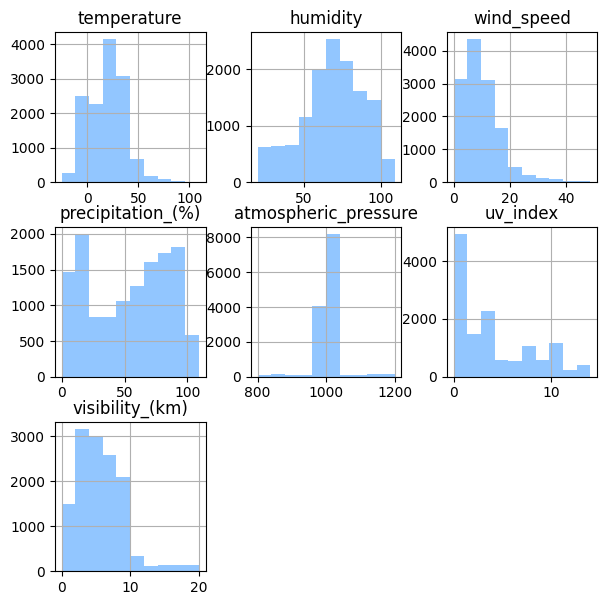

In [ ]:
col_num.hist(figsize=(7,7))
plt.show()

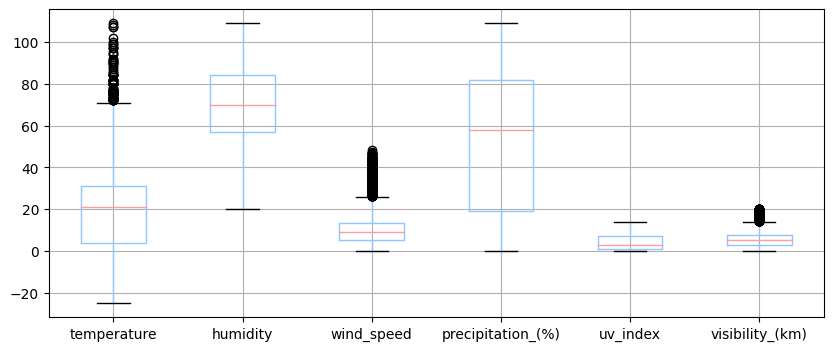

In [ ]:
col_num[['temperature', 'humidity', 'wind_speed', 'precipitation_(%)',
       'uv_index', 'visibility_(km)']].boxplot(figsize=(10,4))
plt.show()

<Axes: >

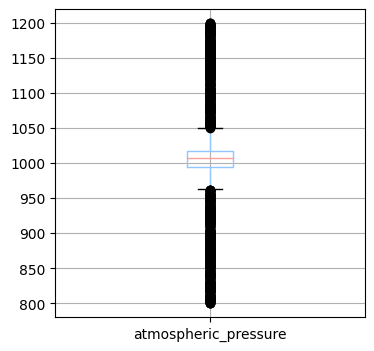

In [ ]:
col_num[['atmospheric_pressure']].boxplot(figsize=(4,4))

변수

- 온도 (숫자): 극심한 추위에서 극심한 더위에 이르는 섭씨 온도.
- 습도(숫자): 이상값을 도입하기 위해 100% 이상의 값을 포함한 습도 비율.
- 풍속(숫자): 비현실적으로 높은 값을 포함하는 범위와 함께 시속 킬로미터의 풍속.
- 강수량 (%) (숫자): 이상값을 포함한 강수량 비율.
- 클라우드 커버 (카테고리): 클라우드 커버 설명.
- 대기압(숫자): 넓은 범위를 커버하는 hPa의 대기압.
- UV 지수 (숫자): 자외선의 강도를 나타내는 UV 지수.
- 시즌 (카테고리): 데이터가 기록된 시즌.
- 가시성 (km) (숫자): 매우 낮거나 매우 높은 값을 포함한 킬로미터 단위의 가시성.
- 위치 (카테고리): 데이터가 기록된 위치의 유형.
- 날씨 유형 (범주): 날씨 유형을 나타내는 분류 대상 변수.

#### 전처리(임의로 삭제)

In [ ]:
df = df.drop(df[df['temperature'] > 60].index, axis=0) # 온도 이상치 처리 60도 이상 삭제

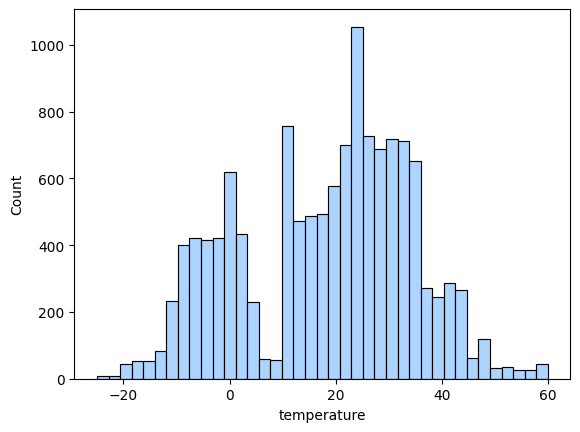

In [ ]:
sns.histplot(df['temperature'])
plt.show()

In [ ]:
df = df.drop(df[df['humidity'] > 100].index, axis=0) #습도가 100 이상인 행 제거

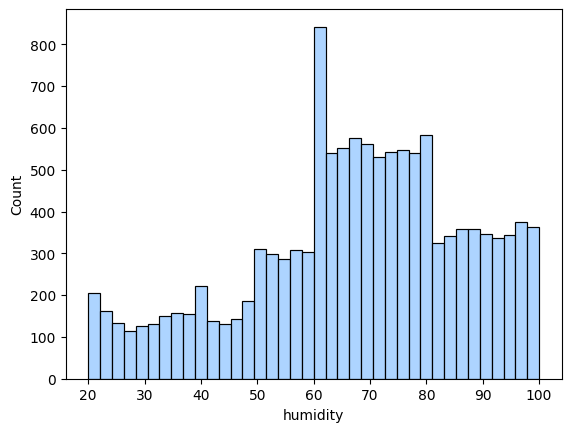

In [ ]:
sns.histplot(df['humidity'])
plt.show()

<Axes: xlabel='precipitation_(%)', ylabel='Count'>

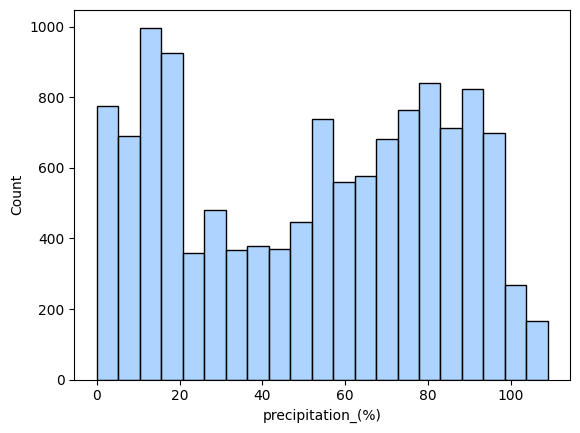

In [ ]:
sns.histplot(df['precipitation_(%)'])

In [ ]:
df[df['precipitation_(%)'] > 100] = 100 # 강수확률이 100퍼센트 이상인 값 100퍼센트로 치환

<Axes: xlabel='precipitation_(%)', ylabel='Count'>

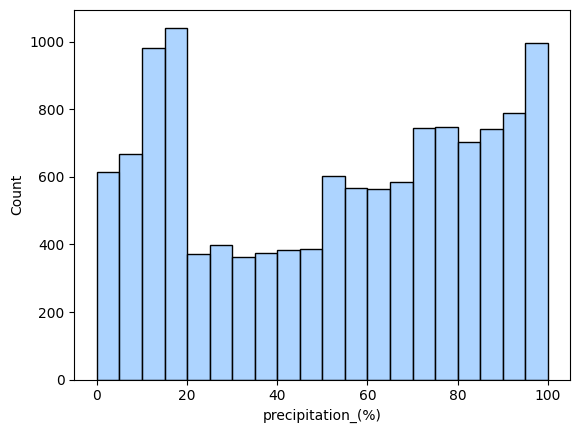

In [ ]:
sns.histplot(df['precipitation_(%)'])

<Axes: xlabel='atmospheric_pressure', ylabel='Count'>

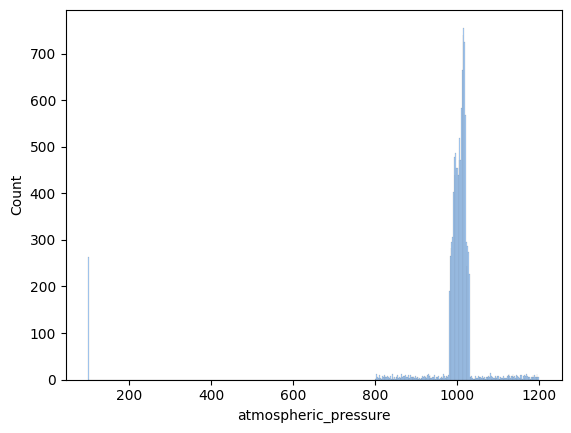

In [ ]:
sns.histplot(df['atmospheric_pressure'])

In [ ]:
# 800보다 작거나 1200보다 큰 대기압 수치 삭제
df = df.drop(df[(df['atmospheric_pressure'] < 800) | (df['atmospheric_pressure'] > 1200)].index, axis=0)

<Axes: xlabel='atmospheric_pressure', ylabel='Count'>

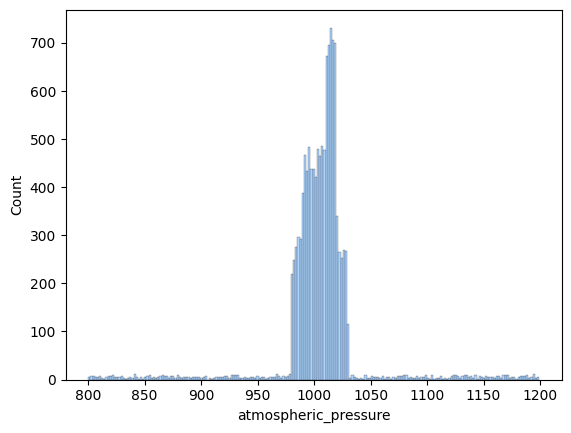

In [ ]:
sns.histplot(df['atmospheric_pressure'])

<Axes: xlabel='visibility_(km)', ylabel='Count'>

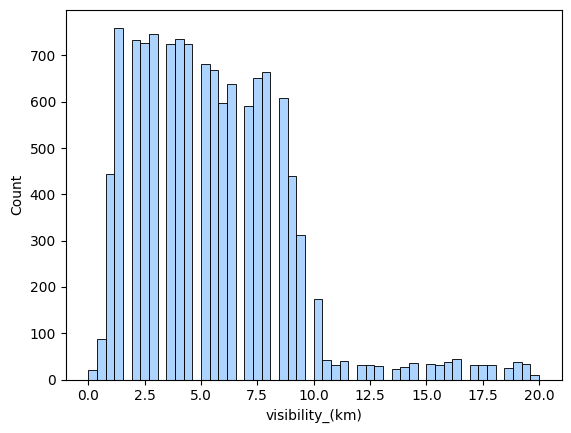

In [ ]:
sns.histplot(df['visibility_(km)'])

In [ ]:
df = df.drop(df[df['visibility_(km)'] == 0].index, axis=0) #가시거리가 0인 경우 행 삭제

In [ ]:
df.head(5)

,temperature,humidity,wind_speed,precipitation_(%),cloud_cover,atmospheric_pressure,uv_index,season,visibility_(km),location,weather_type
0,14.0,73,9.5,82.0,1,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,1,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,0,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,0,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,3,990.67,1,Winter,2.5,mountain,Rainy


#### IQR

In [ ]:
for feature in df[["Temperature","Wind Speed","Atmospheric Pressure","Visibility (km)","Heat Index","Wind Chill"]]:
    Q1,Q3=np.percentile(df[feature],[25,75])
    IQR=Q3-Q1
    upper=Q3+1.5*(IQR)
    lower=Q1-1.5*(IQR)
    df[feature]=np.clip(df[feature],lower,upper)